# Vehicle Detection

*Much code adapted from Udacity's Vehicle Detection and Tracking Lesson*

### 1. Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier (e.g. a Linear SVM classifier)


#### 1.1 Set up helper functions for extracting HOG and colour features

#### 1.2 Prepare data for classifier (extract features)

In [226]:
# Extract features
car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

Using: 8 orientations 8 pixels per cell and 3 cells per block
Feature vector length: 7776


### Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.

#### 1.3 Train classifier

In [227]:
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
training_time = round(t2-t, 4)
print(training_time, 'Seconds to train SVC...')
# Check the score of the SVC
svc_score = round(svc.score(X_test, y_test), 8)
print('Test Accuracy of SVC = ', svc_score)
# Check the prediction time for a single sample
t=time.time()

# Log training parameters and results

with open(logfilepath, "a") as f:
    f.write("\n\n" + str(image_file_name))
    f.write("\nParameters:")
    f.write("\ncolor_space: " + str(color_space))
    f.write("\norient: " + str(orient))
    f.write("\npix_per_cell: " + str(pix_per_cell))
    f.write("\ncell_per_block: " + str(cell_per_block))
    f.write("\nhog_channel: " + str(hog_channel))
    f.write("\nspatial_size: " + str(spatial_size))
    f.write("\nhist_bins: " + str(hist_bins))
    f.write("\nspatial_feat: " + str(spatial_feat))
    f.write("\nhist_feat: " + str(hist_feat))
    f.write("\nhog_feat: " + str(hog_feat))
    f.write('\nFeature vector length:' + str(len(X_train[0])))
    f.write("\n" + str(training_time) + 'Seconds to train SVC...')
    f.write('\nTest Accuracy of SVC = ' + str(svc_score))

print("\nParameters:")
print("color_space: ", color_space)
print("orient: ", orient)
print("pix_per_cell: ", pix_per_cell)
print("cell_per_block: ", cell_per_block)
print("hog_channel: ", hog_channel)
print("spatial_size: ", spatial_size)
print("hist_bins: ", hist_bins)
print("spatial_feat: ", spatial_feat)
print("hist_feat: ", hist_feat)
print("hog_feat: ", hog_feat)

0.228 Seconds to train SVC...
Test Accuracy of SVC =  0.995

Parameters:
color_space:  YCrCb
orient:  8
pix_per_cell:  8
cell_per_block:  3
hog_channel:  ALL
spatial_size:  (16, 16)
hist_bins:  24
spatial_feat:  False
hist_feat:  False
hog_feat:  True


### 2. Implement a sliding-window technique and use your trained classifier to search for vehicles in images.

In [228]:
def draw_on_image(testimage_number):
    # Read in image
    image = mpimg.imread('test_images/test' + str(testimage_number) + '.jpg')
    draw_image = np.copy(image)

    # Rescale data since training data extracted from 
    # .png images (scaled 0 to 1 by mpimg) and image we
    # are searching is .jpg (scaled 0 to 255)
    image = image.astype(np.float32)/255

    # Get list of windows to search at this stage.
    windows = slide_window(image, x_start_stop=[600, 1280], y_start_stop=y_start_stop, 
                        xy_window=(64, 64), xy_overlap=(0.5, 0.5))

    # Return all the windows the classifier has predicted contain car(s) ('positive windows').
    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)                       

    # Draw bounding boxes around the windows that the classifier predicted has cars in them
    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

    # Plot image with bounding boxes drawn.
    plt.title(image_title)
    plt.imshow(window_img)
    plt.savefig(image_file_name + "_window_test" + str(testimage_number))

In [229]:
print("y bounds for region we search using the sliding window technique: ", 
      y_start_stop)

y bounds for region we search using the sliding window technique:  [400, 720]


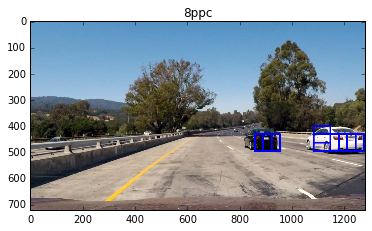

In [230]:
draw_on_image(1)

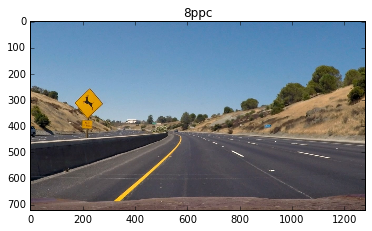

In [231]:
draw_on_image(2)

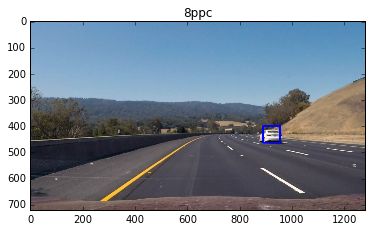

In [232]:
draw_on_image(3)

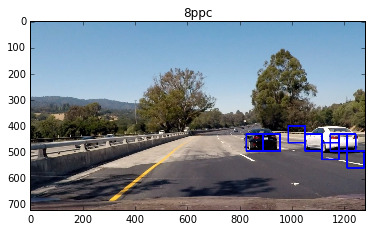

In [233]:
draw_on_image(4)

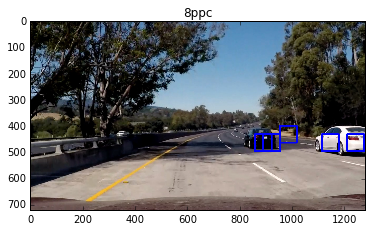

In [234]:
draw_on_image(5)

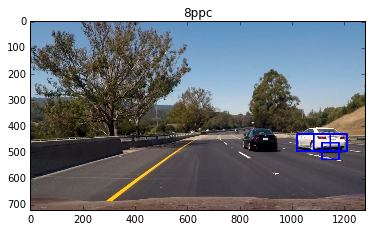

In [235]:
draw_on_image(6)

In [225]:
### TODO: Tweak these parameters and see how the results change.
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 8  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 3 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 24    # Number of histogram bins
spatial_feat = False # Spatial features on or off
hist_feat = False # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 720] # Min and max in y to search in slide_window()
image_file_name = "hogviz/" + str(color_space) + "_ss" + str(spatial_size[0]) + str(spatial_size[1]) + "_hb" + str(hist_bins) + "_TTT_" + "o" + str(orient) \
                    + "_ppc" + str(pix_per_cell) + "_cpb" \
                    + str(cell_per_block) + "_hc" + str(hog_channel)
image_title = str(pix_per_cell) + "ppc"
logfilepath = "logs/hogviz_experiments/ppc_exp1.md"

In [ ]:
# Can be RGB, HSV, LUV, HLS, YUV, YCrCb

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2HLS))

### 4. Run your pipeline on a video stream and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.

In [236]:
def add_bboxes(input_image, windows, classifier, scaler, draw=True, bboxes_only=False):
    """Adds bounding boxes from `input_image` (one array of arrays) to
    the global variable `bboxes_list`'.
    If `draw` is True, returns image overlaid with bounding boxes.
    """
    global bboxes_list
    hot_windows = search_windows(input_image, windows, classifier, scaler, color_space=color_space,
                        spatial_size=spatial_size, hist_bins=hist_bins,
                        orient=orient, pix_per_cell=pix_per_cell,
                        cell_per_block=cell_per_block,
                        hog_channel=hog_channel, spatial_feat=spatial_feat,
                        hist_feat=hist_feat, hog_feat=hog_feat)
    print("Hot windows: ", hot_windows)
    bboxes_list.append(hot_windows)
    if draw == True:
        draw_image = np.copy(input_image)
        window_img = draw_boxes(input_image, hot_windows, color=(0, 0, 255), thick=6)
        return window_img

In [237]:
def add_bboxes_to_list(image):
    """Adds bounding boxes in `image` to global `bboxes_list`.
    Returns image with bounding boxes drawn.
    """
    return add_bboxes(image, windows, svc, X_scaler)

[MoviePy reference](https://zulko.github.io/moviepy/crash_course/crash_course.html)

#### Combine multiple detections and remove false positives

In [238]:
# Read in the last image shown above 
image = mpimg.imread('test_images/test1.jpg')

# Create heatmap template
heatmap_template = np.zeros_like(image[:,:,0]).astype(np.float)

In [239]:
def add_heat(heatmap, box_list):
    """Returns `heatmap` with bounding boxes in `bbox_list` added to it.
    `bbox_list` is an array of boxes.

    This function should be applied per frame.
    """
    # Iterate through list of bboxes
    for box in box_list:
        # Add += 1 for all pixels inside each bbox
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap

### 5. Estimate a bounding box for vehicles detected.

In [241]:
# Implement using a queue of length `recent_frames_used`.
# MVP can just go through the array each time cause I'm lazy

def draw_filtered_bboxes(image, all_bboxes, recent_frames_used=20, threshold=10): 
    """`all_bboxes` is an array of arrays of bboxes.
    Each element represents a frame. Each element is an array of bboxes found in
    that frame."""
    
    # Add bounding boxes from this frame
    add_bboxes(image, windows, svc, X_scaler, draw=False)
    
    if len(all_bboxes) < recent_frames_used + 1:
        recent_frames_used = len(all_bboxes) - 1
    
    frame_heatmap = np.zeros_like(image[:,:,0])
    
    for boxlist in all_bboxes[-recent_frames_used:]:
        frame_heatmap = add_heat(frame_heatmap, boxlist)
    
    # Apply threshold
    frame_heatmap = apply_threshold(frame_heatmap, threshold)
    
    labels = label(frame_heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    plt.imshow(draw_img)
    return draw_img

In [242]:
def process_image(image):
    global bboxes_list    
    
    return draw_filtered_bboxes(image, bboxes_list)

In [ ]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

bboxes_list = []

video = VideoFileClip("project_video.mp4").subclip(25,40)
project_clip = video.fl_image(process_image) #NOTE: this function expects color images!!
video_output = "output_25_40_hog.mp4"
%time project_clip.write_videofile(video_output, audio=False)

print("Bounding boxes: ", bboxes_list)

Hot windows:  []
[MoviePy] >>>> Building video output_25_40_hog.mp4
[MoviePy] Writing video output_25_40_hog.mp4



  0%|          | 1/376 [00:00<04:06,  1.52it/s]

Hot windows:  []



  1%|          | 2/376 [00:01<04:04,  1.53it/s]

Hot windows:  []



  1%|          | 3/376 [00:01<04:01,  1.54it/s]

Hot windows:  [((920, 624), (984, 688))]



  1%|          | 4/376 [00:02<04:04,  1.52it/s]

Hot windows:  [((920, 400), (984, 464))]



  1%|▏         | 5/376 [00:03<04:00,  1.54it/s]

Hot windows:  [((920, 400), (984, 464))]



  2%|▏         | 6/376 [00:03<03:58,  1.55it/s]

Hot windows:  [((920, 400), (984, 464))]



  2%|▏         | 7/376 [00:04<03:54,  1.57it/s]

Hot windows:  [((920, 400), (984, 464))]



  2%|▏         | 8/376 [00:05<04:02,  1.52it/s]

Hot windows:  []



  2%|▏         | 9/376 [00:05<03:59,  1.53it/s]

Hot windows:  []



  3%|▎         | 10/376 [00:06<03:58,  1.53it/s]

Hot windows:  []



  3%|▎         | 11/376 [00:07<04:03,  1.50it/s]

Hot windows:  []



  3%|▎         | 12/376 [00:07<03:59,  1.52it/s]

Hot windows:  []



  3%|▎         | 13/376 [00:08<03:56,  1.53it/s]

Hot windows:  []



  4%|▎         | 14/376 [00:09<03:54,  1.54it/s]

Hot windows:  []



  4%|▍         | 15/376 [00:09<03:53,  1.54it/s]

Hot windows:  []



  4%|▍         | 16/376 [00:10<03:53,  1.54it/s]

Hot windows:  []



  5%|▍         | 17/376 [00:11<03:54,  1.53it/s]

Hot windows:  []



  5%|▍         | 18/376 [00:11<03:54,  1.53it/s]

Hot windows:  []



  5%|▌         | 19/376 [00:12<03:56,  1.51it/s]

Hot windows:  []



  5%|▌         | 20/376 [00:13<03:56,  1.51it/s]

Hot windows:  []



  6%|▌         | 21/376 [00:13<03:58,  1.49it/s]

Hot windows:  []



  6%|▌         | 22/376 [00:14<04:14,  1.39it/s]

Hot windows:  []



  6%|▌         | 23/376 [00:15<04:22,  1.35it/s]

Hot windows:  []



  6%|▋         | 24/376 [00:16<04:15,  1.38it/s]

Hot windows:  []



  7%|▋         | 25/376 [00:16<04:08,  1.41it/s]

Hot windows:  []



  7%|▋         | 26/376 [00:17<04:03,  1.44it/s]

Hot windows:  []



  7%|▋         | 27/376 [00:18<04:02,  1.44it/s]

Hot windows:  []



  7%|▋         | 28/376 [00:18<04:02,  1.43it/s]

Hot windows:  []



  8%|▊         | 29/376 [00:19<04:00,  1.44it/s]

Hot windows:  []



  8%|▊         | 30/376 [00:20<03:59,  1.45it/s]

Hot windows:  []



  8%|▊         | 31/376 [00:20<04:01,  1.43it/s]

Hot windows:  []



  9%|▊         | 32/376 [00:21<04:05,  1.40it/s]

Hot windows:  []



  9%|▉         | 33/376 [00:22<03:58,  1.44it/s]

Hot windows:  []



  9%|▉         | 34/376 [00:23<04:05,  1.39it/s]

Hot windows:  []



  9%|▉         | 35/376 [00:23<04:08,  1.37it/s]

Hot windows:  []



 10%|▉         | 36/376 [00:24<04:01,  1.41it/s]

Hot windows:  [((888, 400), (952, 464))]



 10%|▉         | 37/376 [00:25<04:06,  1.37it/s]

Hot windows:  [((888, 400), (952, 464))]



 10%|█         | 38/376 [00:25<03:58,  1.41it/s]

Hot windows:  [((888, 400), (952, 464))]



 10%|█         | 39/376 [00:26<03:57,  1.42it/s]

Hot windows:  [((888, 400), (952, 464))]



 11%|█         | 40/376 [00:27<03:58,  1.41it/s]

Hot windows:  [((888, 400), (952, 464))]



 11%|█         | 41/376 [00:28<03:59,  1.40it/s]

Hot windows:  []



 11%|█         | 42/376 [00:28<04:01,  1.38it/s]

Hot windows:  []



 11%|█▏        | 43/376 [00:29<04:10,  1.33it/s]

Hot windows:  []



 12%|█▏        | 44/376 [00:30<04:28,  1.24it/s]

Hot windows:  []



 12%|█▏        | 45/376 [00:31<04:35,  1.20it/s]

Hot windows:  []



 12%|█▏        | 46/376 [00:32<04:46,  1.15it/s]

Hot windows:  []



 12%|█▎        | 47/376 [00:33<04:30,  1.22it/s]

Hot windows:  [((888, 400), (952, 464))]



 13%|█▎        | 48/376 [00:33<04:28,  1.22it/s]

Hot windows:  [((888, 400), (952, 464))]



 13%|█▎        | 49/376 [00:34<04:17,  1.27it/s]

Hot windows:  []



 13%|█▎        | 50/376 [00:35<04:08,  1.31it/s]

Hot windows:  [((888, 400), (952, 464))]



 14%|█▎        | 51/376 [00:36<04:00,  1.35it/s]

Hot windows:  [((888, 400), (952, 464))]



 14%|█▍        | 52/376 [00:36<03:55,  1.38it/s]

Hot windows:  [((888, 400), (952, 464))]



 14%|█▍        | 53/376 [00:37<03:51,  1.40it/s]

Hot windows:  [((888, 400), (952, 464))]



 14%|█▍        | 54/376 [00:38<03:48,  1.41it/s]

Hot windows:  []



 15%|█▍        | 55/376 [00:38<03:46,  1.42it/s]

Hot windows:  []



 15%|█▍        | 56/376 [00:39<03:44,  1.43it/s]

Hot windows:  []



 15%|█▌        | 57/376 [00:40<03:42,  1.43it/s]

Hot windows:  []



 15%|█▌        | 58/376 [00:40<03:40,  1.44it/s]

Hot windows:  []



 16%|█▌        | 59/376 [00:41<03:41,  1.43it/s]

Hot windows:  []



 16%|█▌        | 60/376 [00:42<03:39,  1.44it/s]

Hot windows:  []



 16%|█▌        | 61/376 [00:42<03:37,  1.45it/s]

Hot windows:  []



 16%|█▋        | 62/376 [00:43<03:36,  1.45it/s]

Hot windows:  []



 17%|█▋        | 63/376 [00:44<03:34,  1.46it/s]

Hot windows:  []



 17%|█▋        | 64/376 [00:44<03:31,  1.47it/s]

Hot windows:  []



 17%|█▋        | 65/376 [00:45<03:30,  1.47it/s]

Hot windows:  []



 18%|█▊        | 66/376 [00:46<03:31,  1.47it/s]

Hot windows:  []



 18%|█▊        | 67/376 [00:47<03:29,  1.48it/s]

Hot windows:  []



 18%|█▊        | 68/376 [00:47<03:27,  1.48it/s]

Hot windows:  []



 18%|█▊        | 69/376 [00:48<03:26,  1.48it/s]

Hot windows:  []



 19%|█▊        | 70/376 [00:49<03:25,  1.49it/s]

Hot windows:  []



 19%|█▉        | 71/376 [00:49<03:24,  1.49it/s]

Hot windows:  []



 19%|█▉        | 72/376 [00:50<03:24,  1.49it/s]

Hot windows:  []



 19%|█▉        | 73/376 [00:51<03:24,  1.48it/s]

Hot windows:  []



 20%|█▉        | 74/376 [00:51<03:23,  1.48it/s]

Hot windows:  [((1208, 496), (1272, 560))]



 20%|█▉        | 75/376 [00:52<03:23,  1.48it/s]

Hot windows:  []



 20%|██        | 76/376 [00:53<03:21,  1.49it/s]

Hot windows:  []



 20%|██        | 77/376 [00:53<03:19,  1.50it/s]

Hot windows:  []



 21%|██        | 78/376 [00:54<03:17,  1.51it/s]

Hot windows:  []



 21%|██        | 79/376 [00:55<03:17,  1.50it/s]

Hot windows:  []



 21%|██▏       | 80/376 [00:55<03:16,  1.51it/s]

Hot windows:  []



 22%|██▏       | 81/376 [00:56<03:18,  1.49it/s]

Hot windows:  []



 22%|██▏       | 82/376 [00:57<03:17,  1.49it/s]

Hot windows:  []



 22%|██▏       | 83/376 [00:57<03:15,  1.50it/s]

Hot windows:  []



 22%|██▏       | 84/376 [00:58<03:15,  1.50it/s]

Hot windows:  []



 23%|██▎       | 85/376 [00:59<03:18,  1.46it/s]

Hot windows:  []



 23%|██▎       | 86/376 [00:59<03:23,  1.43it/s]

Hot windows:  []



 23%|██▎       | 87/376 [01:00<03:28,  1.39it/s]

Hot windows:  []



 23%|██▎       | 88/376 [01:01<03:26,  1.39it/s]

Hot windows:  [((1208, 592), (1272, 656))]



 24%|██▎       | 89/376 [01:02<03:23,  1.41it/s]

Hot windows:  [((1208, 592), (1272, 656))]



 24%|██▍       | 90/376 [01:02<03:18,  1.44it/s]

Hot windows:  []



 24%|██▍       | 91/376 [01:03<03:15,  1.46it/s]

Hot windows:  []



 24%|██▍       | 92/376 [01:04<03:18,  1.43it/s]

Hot windows:  []



 25%|██▍       | 93/376 [01:04<03:13,  1.46it/s]

Hot windows:  []



 25%|██▌       | 94/376 [01:05<03:12,  1.46it/s]

Hot windows:  []



 25%|██▌       | 95/376 [01:06<03:20,  1.40it/s]

Hot windows:  []



 26%|██▌       | 96/376 [01:06<03:24,  1.37it/s]

Hot windows:  []



 26%|██▌       | 97/376 [01:07<03:20,  1.39it/s]

Hot windows:  []



 26%|██▌       | 98/376 [01:08<03:15,  1.42it/s]

Hot windows:  []



 26%|██▋       | 99/376 [01:08<03:12,  1.44it/s]

Hot windows:  [((1144, 560), (1208, 624))]



 27%|██▋       | 100/376 [01:09<03:17,  1.40it/s]

Hot windows:  [((1144, 560), (1208, 624))]



 27%|██▋       | 101/376 [01:10<03:24,  1.35it/s]

Hot windows:  [((1144, 560), (1208, 624))]



 27%|██▋       | 102/376 [01:11<03:26,  1.32it/s]

Hot windows:  [((1208, 560), (1272, 624))]



 27%|██▋       | 103/376 [01:12<03:29,  1.30it/s]

Hot windows:  [((1176, 560), (1240, 624))]



 28%|██▊       | 104/376 [01:12<03:35,  1.26it/s]

Hot windows:  []



 28%|██▊       | 105/376 [01:13<03:36,  1.25it/s]

Hot windows:  []



 28%|██▊       | 106/376 [01:14<03:37,  1.24it/s]

Hot windows:  [((888, 400), (952, 464))]



 28%|██▊       | 107/376 [01:15<03:30,  1.28it/s]

Hot windows:  [((888, 400), (952, 464))]



 29%|██▊       | 108/376 [01:16<03:26,  1.30it/s]

Hot windows:  []



 29%|██▉       | 109/376 [01:16<03:22,  1.32it/s]

Hot windows:  []



 29%|██▉       | 110/376 [01:17<03:21,  1.32it/s]

Hot windows:  []



 30%|██▉       | 111/376 [01:18<03:23,  1.30it/s]

Hot windows:  [((888, 400), (952, 464))]



 30%|██▉       | 112/376 [01:19<03:18,  1.33it/s]

Hot windows:  [((888, 400), (952, 464))]



 30%|███       | 113/376 [01:19<03:10,  1.38it/s]

Hot windows:  [((888, 400), (952, 464))]



 30%|███       | 114/376 [01:20<03:13,  1.35it/s]

Hot windows:  [((888, 400), (952, 464))]



 31%|███       | 115/376 [01:21<03:18,  1.32it/s]

Hot windows:  [((888, 400), (952, 464))]



 31%|███       | 116/376 [01:22<03:15,  1.33it/s]

Hot windows:  [((888, 400), (952, 464))]



 31%|███       | 117/376 [01:22<03:08,  1.37it/s]

Hot windows:  [((888, 400), (952, 464)), ((1144, 528), (1208, 592))]



 31%|███▏      | 118/376 [01:23<03:00,  1.43it/s]

Hot windows:  [((888, 400), (952, 464)), ((1080, 528), (1144, 592)), ((1144, 528), (1208, 592))]



 32%|███▏      | 119/376 [01:23<02:54,  1.48it/s]

Hot windows:  [((1080, 528), (1144, 592)), ((1112, 528), (1176, 592))]



 32%|███▏      | 120/376 [01:24<02:54,  1.46it/s]

Hot windows:  [((888, 400), (952, 464)), ((1080, 528), (1144, 592)), ((1112, 528), (1176, 592)), ((1144, 528), (1208, 592))]



 32%|███▏      | 121/376 [01:25<02:55,  1.45it/s]

Hot windows:  [((888, 400), (952, 464)), ((1080, 528), (1144, 592)), ((1112, 528), (1176, 592)), ((1144, 528), (1208, 592)), ((1176, 528), (1240, 592))]



 32%|███▏      | 122/376 [01:26<02:51,  1.48it/s]

Hot windows:  [((888, 400), (952, 464)), ((1112, 528), (1176, 592))]



 33%|███▎      | 123/376 [01:26<02:47,  1.51it/s]

Hot windows:  [((888, 400), (952, 464)), ((1080, 528), (1144, 592)), ((1112, 528), (1176, 592))]



 33%|███▎      | 124/376 [01:27<02:44,  1.53it/s]

Hot windows:  [((888, 400), (952, 464)), ((1112, 528), (1176, 592))]



 33%|███▎      | 125/376 [01:27<02:47,  1.50it/s]

Hot windows:  [((888, 400), (952, 464)), ((1112, 528), (1176, 592))]



 34%|███▎      | 126/376 [01:28<02:52,  1.45it/s]

Hot windows:  [((888, 400), (952, 464))]



 34%|███▍      | 127/376 [01:29<02:56,  1.41it/s]

Hot windows:  [((888, 400), (952, 464))]



 34%|███▍      | 128/376 [01:30<02:59,  1.38it/s]

Hot windows:  []



 34%|███▍      | 129/376 [01:31<03:02,  1.36it/s]

Hot windows:  []



 35%|███▍      | 130/376 [01:31<03:03,  1.34it/s]

Hot windows:  []



 35%|███▍      | 131/376 [01:32<03:07,  1.31it/s]

Hot windows:  []



 35%|███▌      | 132/376 [01:33<03:05,  1.32it/s]

Hot windows:  []



 35%|███▌      | 133/376 [01:34<03:03,  1.33it/s]

Hot windows:  []



 36%|███▌      | 134/376 [01:34<03:03,  1.32it/s]

Hot windows:  []



 36%|███▌      | 135/376 [01:35<03:15,  1.23it/s]

Hot windows:  []



 36%|███▌      | 136/376 [01:36<03:11,  1.26it/s]

Hot windows:  []



 36%|███▋      | 137/376 [01:37<03:05,  1.29it/s]

Hot windows:  []



 37%|███▋      | 138/376 [01:37<03:00,  1.32it/s]

Hot windows:  []



 37%|███▋      | 139/376 [01:38<02:59,  1.32it/s]

Hot windows:  [((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1016, 496), (1080, 560))]



 37%|███▋      | 140/376 [01:39<02:56,  1.34it/s]

Hot windows:  [((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1016, 496), (1080, 560))]



 38%|███▊      | 141/376 [01:40<02:50,  1.38it/s]

Hot windows:  [((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1016, 496), (1080, 560))]



 38%|███▊      | 142/376 [01:40<02:42,  1.44it/s]

Hot windows:  [((1144, 464), (1208, 528)), ((1016, 496), (1080, 560))]



 38%|███▊      | 143/376 [01:41<02:37,  1.48it/s]

Hot windows:  [((1016, 496), (1080, 560))]



 38%|███▊      | 144/376 [01:42<02:32,  1.52it/s]

Hot windows:  [((1016, 496), (1080, 560))]



 39%|███▊      | 145/376 [01:42<02:29,  1.55it/s]

Hot windows:  [((1016, 496), (1080, 560))]



 39%|███▉      | 146/376 [01:43<02:26,  1.57it/s]

Hot windows:  [((1016, 496), (1080, 560))]



 39%|███▉      | 147/376 [01:43<02:24,  1.58it/s]

Hot windows:  [((1016, 496), (1080, 560))]



 39%|███▉      | 148/376 [01:44<02:22,  1.60it/s]

Hot windows:  [((1016, 496), (1080, 560))]



 40%|███▉      | 149/376 [01:45<02:21,  1.60it/s]

Hot windows:  [((1016, 496), (1080, 560))]



 40%|███▉      | 150/376 [01:45<02:20,  1.61it/s]

Hot windows:  [((1016, 496), (1080, 560))]



 40%|████      | 151/376 [01:46<02:20,  1.60it/s]

Hot windows:  [((1016, 496), (1080, 560))]



 40%|████      | 152/376 [01:46<02:19,  1.61it/s]

Hot windows:  [((1016, 496), (1080, 560))]



 41%|████      | 153/376 [01:47<02:18,  1.61it/s]

Hot windows:  [((1112, 464), (1176, 528)), ((1016, 496), (1080, 560))]



 41%|████      | 154/376 [01:48<02:19,  1.59it/s]

Hot windows:  []



 41%|████      | 155/376 [01:48<02:20,  1.57it/s]

Hot windows:  [((1048, 496), (1112, 560))]



 41%|████▏     | 156/376 [01:49<02:28,  1.48it/s]

Hot windows:  [((1048, 496), (1112, 560))]



 42%|████▏     | 157/376 [01:50<02:26,  1.49it/s]

Hot windows:  [((1048, 496), (1112, 560))]



 42%|████▏     | 158/376 [01:50<02:24,  1.51it/s]

Hot windows:  [((1048, 496), (1112, 560))]



 42%|████▏     | 159/376 [01:51<02:20,  1.54it/s]

Hot windows:  [((1048, 496), (1112, 560))]



 43%|████▎     | 160/376 [01:52<02:18,  1.56it/s]

Hot windows:  [((920, 464), (984, 528)), ((1048, 496), (1112, 560))]



 43%|████▎     | 161/376 [01:52<02:16,  1.58it/s]

Hot windows:  []



 43%|████▎     | 162/376 [01:53<02:19,  1.53it/s]

Hot windows:  [((920, 464), (984, 528))]



 43%|████▎     | 163/376 [01:54<02:22,  1.49it/s]

Hot windows:  [((920, 464), (984, 528))]



 44%|████▎     | 164/376 [01:54<02:20,  1.50it/s]

Hot windows:  []



 44%|████▍     | 165/376 [01:55<02:20,  1.50it/s]

Hot windows:  [((920, 464), (984, 528))]



 44%|████▍     | 166/376 [01:56<02:20,  1.49it/s]

Hot windows:  []



 44%|████▍     | 167/376 [01:56<02:20,  1.49it/s]

Hot windows:  []



 45%|████▍     | 168/376 [01:57<02:18,  1.50it/s]

Hot windows:  []



 45%|████▍     | 169/376 [01:58<02:17,  1.51it/s]

Hot windows:  []



 45%|████▌     | 170/376 [01:58<02:15,  1.52it/s]

Hot windows:  []



 45%|████▌     | 171/376 [01:59<02:13,  1.53it/s]

Hot windows:  []



 46%|████▌     | 172/376 [02:00<02:13,  1.53it/s]

Hot windows:  []



 46%|████▌     | 173/376 [02:00<02:12,  1.53it/s]

Hot windows:  []



 46%|████▋     | 174/376 [02:01<02:11,  1.53it/s]

Hot windows:  []



 47%|████▋     | 175/376 [02:02<02:11,  1.53it/s]

Hot windows:  [((1112, 464), (1176, 528))]



 47%|████▋     | 176/376 [02:02<02:11,  1.52it/s]

Hot windows:  []



 47%|████▋     | 177/376 [02:03<02:12,  1.50it/s]

Hot windows:  []



 47%|████▋     | 178/376 [02:04<02:10,  1.52it/s]

Hot windows:  []



 48%|████▊     | 179/376 [02:04<02:09,  1.52it/s]

Hot windows:  []



 48%|████▊     | 180/376 [02:05<02:09,  1.52it/s]

Hot windows:  []



 48%|████▊     | 181/376 [02:06<02:08,  1.52it/s]

Hot windows:  []



 48%|████▊     | 182/376 [02:06<02:08,  1.51it/s]

Hot windows:  []



 49%|████▊     | 183/376 [02:07<02:10,  1.48it/s]

Hot windows:  []



 49%|████▉     | 184/376 [02:08<02:11,  1.46it/s]

Hot windows:  [((888, 464), (952, 528))]



 49%|████▉     | 185/376 [02:08<02:12,  1.44it/s]

Hot windows:  []



 49%|████▉     | 186/376 [02:09<02:21,  1.35it/s]

Hot windows:  [((888, 464), (952, 528))]



 50%|████▉     | 187/376 [02:10<02:20,  1.35it/s]

Hot windows:  []



 50%|█████     | 188/376 [02:11<02:18,  1.36it/s]

Hot windows:  []



 50%|█████     | 189/376 [02:11<02:12,  1.41it/s]

Hot windows:  []



 51%|█████     | 190/376 [02:12<02:09,  1.44it/s]

Hot windows:  []



 51%|█████     | 191/376 [02:13<02:08,  1.44it/s]

Hot windows:  []



 51%|█████     | 192/376 [02:13<02:11,  1.40it/s]

Hot windows:  []



 51%|█████▏    | 193/376 [02:14<02:07,  1.44it/s]

Hot windows:  []



 52%|█████▏    | 194/376 [02:15<02:03,  1.47it/s]

Hot windows:  []



 52%|█████▏    | 195/376 [02:15<02:01,  1.49it/s]

Hot windows:  []



 52%|█████▏    | 196/376 [02:16<01:59,  1.50it/s]

Hot windows:  []



 52%|█████▏    | 197/376 [02:17<02:00,  1.48it/s]

Hot windows:  [((952, 464), (1016, 528)), ((984, 464), (1048, 528))]



 53%|█████▎    | 198/376 [02:17<01:58,  1.50it/s]

Hot windows:  [((952, 464), (1016, 528)), ((984, 464), (1048, 528))]



 53%|█████▎    | 199/376 [02:18<01:56,  1.52it/s]

Hot windows:  [((920, 464), (984, 528)), ((952, 464), (1016, 528))]



 53%|█████▎    | 200/376 [02:19<01:56,  1.51it/s]

Hot windows:  [((952, 464), (1016, 528))]



 53%|█████▎    | 201/376 [02:19<01:56,  1.51it/s]

Hot windows:  [((952, 464), (1016, 528))]



 54%|█████▎    | 202/376 [02:20<01:54,  1.53it/s]

Hot windows:  [((952, 464), (1016, 528)), ((984, 464), (1048, 528))]



 54%|█████▍    | 203/376 [02:21<01:52,  1.54it/s]

Hot windows:  [((952, 464), (1016, 528))]



 54%|█████▍    | 204/376 [02:21<01:52,  1.53it/s]

Hot windows:  [((952, 464), (1016, 528))]



 55%|█████▍    | 205/376 [02:22<01:53,  1.50it/s]

Hot windows:  [((952, 464), (1016, 528))]



 55%|█████▍    | 206/376 [02:23<01:53,  1.50it/s]

Hot windows:  [((920, 464), (984, 528)), ((952, 464), (1016, 528))]



 55%|█████▌    | 207/376 [02:23<01:50,  1.53it/s]

Hot windows:  [((920, 464), (984, 528)), ((952, 464), (1016, 528))]



 55%|█████▌    | 208/376 [02:24<01:49,  1.54it/s]

Hot windows:  [((920, 464), (984, 528)), ((952, 464), (1016, 528))]



 56%|█████▌    | 209/376 [02:25<01:47,  1.55it/s]

Hot windows:  [((920, 464), (984, 528))]



 56%|█████▌    | 210/376 [02:25<01:46,  1.55it/s]

Hot windows:  [((920, 464), (984, 528))]



 56%|█████▌    | 211/376 [02:26<01:44,  1.57it/s]

Hot windows:  []



 56%|█████▋    | 212/376 [02:26<01:43,  1.58it/s]

Hot windows:  []



 57%|█████▋    | 213/376 [02:27<01:42,  1.59it/s]

Hot windows:  [((920, 464), (984, 528))]



 57%|█████▋    | 214/376 [02:28<01:42,  1.59it/s]

Hot windows:  []



 57%|█████▋    | 215/376 [02:28<01:41,  1.58it/s]

Hot windows:  []



 57%|█████▋    | 216/376 [02:29<01:41,  1.58it/s]

Hot windows:  []



 58%|█████▊    | 217/376 [02:30<01:40,  1.58it/s]

Hot windows:  [((888, 464), (952, 528))]



 58%|█████▊    | 218/376 [02:30<01:39,  1.58it/s]

Hot windows:  [((888, 464), (952, 528))]



 58%|█████▊    | 219/376 [02:31<01:39,  1.58it/s]

Hot windows:  [((888, 464), (952, 528))]



 59%|█████▊    | 220/376 [02:32<01:39,  1.57it/s]

Hot windows:  [((888, 464), (952, 528))]


In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output))